# Simple Linear Regression

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is perhaps the most simple of all of the models. Do you remember the linear formula where `m` is the slope and `b` is where the line starts on the y-axis?

$$y=mx+b$$

This is a simple linear model since there is only one coefficient - `mx`.

## Imports and load data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

In [5]:
df = pd.read_csv("./SalaryData.csv")

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.shape

(30, 2)

## Split data

Splitting the depedent variable (`Salary`) out from the indepedent variable (`YearsExperience`) so we can build our model.

We use the `train_test_split` method from `scikit-learn` to split our data. The `test_size` is used to tell it what percentage of the data to use for our testing data set and the `random_state` is used as a seed for the random splitting of the data. The seed will randomize the split in the same way each time for reproducability.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Salary", axis="columns"), df["Salary"], test_size=0.2, random_state=42)

In [10]:
print("Train shape - ", x_train.shape)
print("Test shape - ", x_test.shape)

Train shape -  (24, 1)
Test shape -  (6, 1)


## Predict

We're making three other data sets for the `LinearRegression` model:
- `test_set` that is just the `YearsExperience` column (dropping the `Salary` column) that will be used for analyzing and scoring our model.
- `train_labels` that is just the `Salary` column to train the `LinearRegression` model what the answers are when passing in the years of experience input.
- `train_set` that is also just the `YearsExperience` column (dropping the `Salary` column) that will be passed into the `LinearRegression`'s `fit` method as the `x` parameter.

In [11]:
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now we have a model and can call the `predict` function on it with inputs. 

In [13]:
salary_pred = lin_reg.predict(x_test)
salary_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

## Analyze Results

We can get the coefficients and intercept from our model.

In [14]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [9423.81532303]
Intercept:  25321.583011776813


With that information we can build our line formula - $y=9423.81532303x + 25321.5830118$

We can compare our predictions to our testing set label columns.

In [22]:
print(salary_pred)
print(y_test)

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]
27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


Models in `scikit-learn` have a `score` method. Depending on the model, this method will do a different calculation. For `LinearRegression` it calculates the $r^2$, which measures how close the data is to the model.

In [24]:
lin_reg.score(x_test, y_test)

0.9024461774180497

There's also a separate `r2_score` method that will calculate the $r^2$.

In [25]:
r2_score(y_test, salary_pred)

0.9024461774180497

We can also plot our test data as a scatter plot and, with our predicted salary that we got from our model, plot a line to see how well it fits the data.

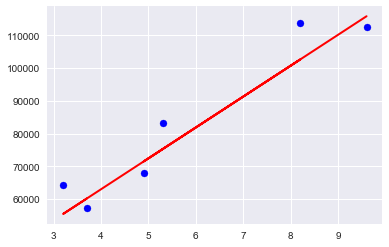

In [26]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, salary_pred, color='red', linewidth=2)